# Analisis Data 

In [16]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv("SP1_new.csv")

# Konversi string ke format datetime
df1["Time"] = pd.to_datetime(df1["Time"].str.strip(), format="%H:%M:%S.%f")
start_time = df1["Time"].iloc[0]
df1["Time"] = (df1["Time"] - start_time).dt.total_seconds()

df1

,Time,Frequency Reference,Output Frequency,Output Current,Output Voltage,Output Power,DC Bus Voltage,Output Frequency After Soft-start,Peak Voltage Current,Regenerative Power (kWh),Power Supply Voltage,Power Supply Frequency,Electric Power (kWh),Cooling Fin Temperature,Peak Voltage Output Frequency,Motor q-Axis Current during Fault,Fin Temperature
0,0.000,48.18,48.18,82.05,371.1,42.7,588.0,48.18,199.8,0.0,399.0,50.0,938.0,36.0,2.23,-11.5,32.0
1,0.155,48.17,48.17,80.86,371.0,43.7,589.0,48.17,199.8,0.0,399.0,50.0,938.0,36.0,2.23,-11.5,32.0
2,0.297,48.16,48.16,82.14,370.9,40.8,590.0,48.14,199.8,0.0,400.0,50.0,938.0,36.0,2.23,-11.5,32.0
3,0.434,48.14,48.14,82.67,370.9,43.7,593.0,48.15,199.8,0.0,400.0,50.0,938.0,36.0,2.23,-11.5,32.0
4,0.572,48.17,48.17,86.77,371.1,45.7,586.0,48.16,199.8,0.0,399.0,50.0,938.0,36.0,2.23,-11.5,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,1915.752,48.17,48.17,82.27,371.2,45.9,585.0,48.17,199.8,0.0,397.0,50.0,962.0,37.0,2.23,-11.5,32.0
1972,1917.111,48.17,48.17,85.09,371.2,44.5,591.0,48.17,199.8,0.0,399.0,50.0,962.0,37.0,2.23,-11.5,32.0
1973,1918.540,48.16,48.16,86.99,371.3,45.8,590.0,48.16,199.8,0.0,398.0,49.9,962.0,37.0,2.23,-11.5,32.0
1974,1919.901,48.17,48.17,81.44,371.1,46.3,584.0,48.17,199.8,0.0,398.0,50.0,962.0,37.0,2.23,-11.5,32.0


In [18]:
# Kolom baru
df1['RPM Ref'] = df1['Frequency Reference'] * 120 / 2
df1['RPM Out'] = df1['Output Frequency'] * 120 / 2
df1['Power Factor'] = (df1['Output Power'] * 1000) / (np.sqrt(3) * df1['Output Voltage'] * df1['Output Current'])
df1['Slip (%)'] = (abs(df1['RPM Out'] - df1['RPM Ref']) / df1['RPM Out']) * 100
df1['Daya Semu (kVA)'] = (np.sqrt(3) * df1['Output Voltage'] * df1['Output Current']) / 1000
df1['Efficiency (%)'] = 93.5
df1['Daya Output Motor (kW)'] = (np.sqrt(3) * df1['Output Voltage'] * df1['Output Current'] * df1['Efficiency (%)'] / 100 * df1['Power Factor']) / 1000
df1['Torque (Nm)'] = 9555*df1['Daya Output Motor (kW)']/df1['RPM Out']
df1

,Time,Frequency Reference,Output Frequency,Output Current,Output Voltage,Output Power,DC Bus Voltage,Output Frequency After Soft-start,Peak Voltage Current,Regenerative Power (kWh),...,Motor q-Axis Current during Fault,Fin Temperature,RPM Ref,RPM Out,Power Factor,Slip (%),Daya Semu (kVA),Efficiency (%),Daya Output Motor (kW),Torque (Nm)
0,0.000,48.18,48.18,82.05,371.1,42.7,588.0,48.18,199.8,0.0,...,-11.5,32.0,2890.8,2890.8,0.809651,0.0,52.738791,93.5,39.9245,131.962985
1,0.155,48.17,48.17,80.86,371.0,43.7,589.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.841033,0.0,51.959896,93.5,40.8595,135.081490
2,0.297,48.16,48.16,82.14,370.9,40.8,590.0,48.14,199.8,0.0,...,-11.5,32.0,2889.6,2889.6,0.773193,0.0,52.768185,93.5,38.1480,126.143459
3,0.434,48.14,48.14,82.67,370.9,43.7,593.0,48.15,199.8,0.0,...,-11.5,32.0,2888.4,2888.4,0.822841,0.0,53.108667,93.5,40.8595,135.165670
4,0.572,48.17,48.17,86.77,371.1,45.7,586.0,48.16,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.819398,0.0,55.772637,93.5,42.7295,141.263709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,1915.752,48.17,48.17,82.27,371.2,45.9,585.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.867766,0.0,52.894448,93.5,42.9165,141.881931
1972,1917.111,48.17,48.17,85.09,371.2,44.5,591.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.813416,0.0,54.707531,93.5,41.6075,137.554378
1973,1918.540,48.16,48.16,86.99,371.3,45.8,590.0,48.16,199.8,0.0,...,-11.5,32.0,2889.6,2889.6,0.818673,0.0,55.944179,93.5,42.8230,141.602217
1974,1919.901,48.17,48.17,81.44,371.1,46.3,584.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.884487,0.0,52.346705,93.5,43.2905,143.118375


In [19]:
features = [
    "Output Frequency", "Output Current", "Output Voltage",
    "Output Power", "Power Factor", "Daya Output Motor (kW)", "Torque (Nm)"
]  
df1[features].describe()

,Output Frequency,Output Current,Output Voltage,Output Power,Power Factor,Daya Output Motor (kW),Torque (Nm)
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,48.165385,83.267814,371.092814,44.138259,0.824931,41.269272,136.449153
std,0.008654,2.098744,0.112639,2.054883,0.038209,1.921316,6.349999
min,48.140000,79.230000,370.700000,37.000000,0.709336,34.595000,114.442330
25%,48.160000,81.700000,371.000000,43.000000,0.803529,40.205000,132.972923
50%,48.170000,82.800000,371.100000,44.700000,0.824706,41.794500,138.201290
75%,48.170000,84.740000,371.200000,45.600000,0.855075,42.636000,140.954598
max,48.190000,88.310000,371.400000,48.100000,0.903274,44.973500,148.682372


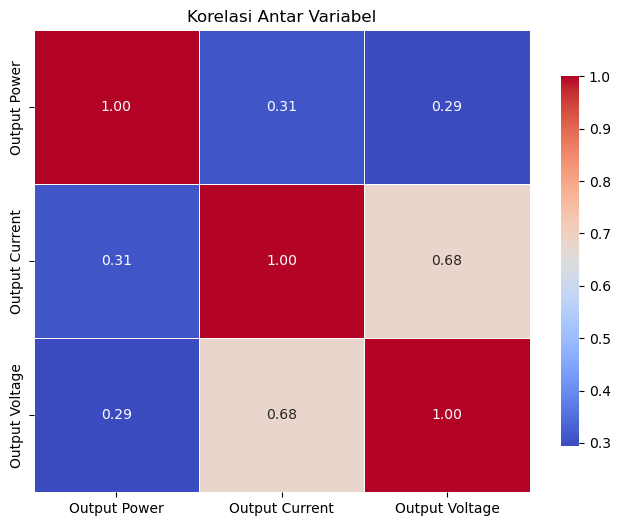

In [20]:
filtered_cols = ["Output Power", "Output Current", "Output Voltage"]
filtered_df1 = df1[filtered_cols]

# Menghitung korelasi
corr = filtered_df1.corr()

# Reordering agar Output Power di kiri, Current & Voltage di bawahnya
corr = corr.loc[["Output Power", "Output Current", "Output Voltage"], 
                ["Output Power", "Output Current", "Output Voltage"]]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            xticklabels=True, yticklabels=True, cbar_kws={"shrink": 0.8})
plt.title('Korelasi Antar Variabel')
plt.show()


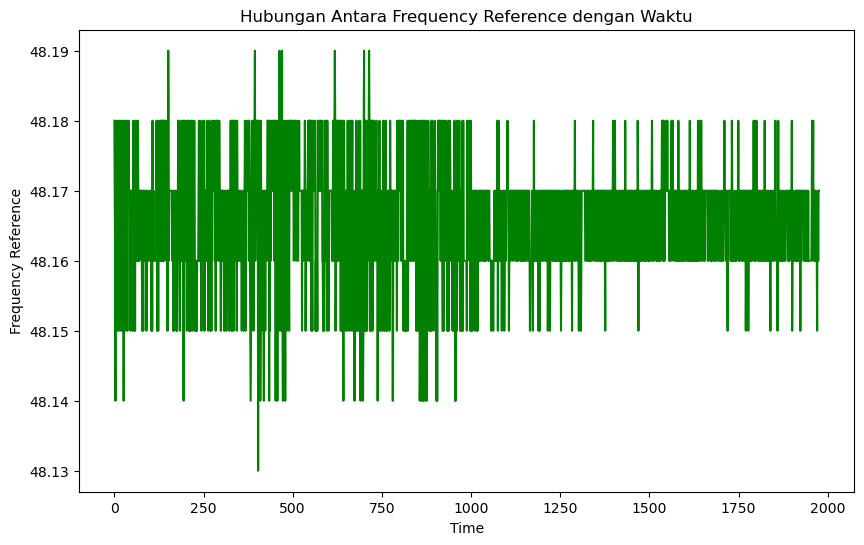

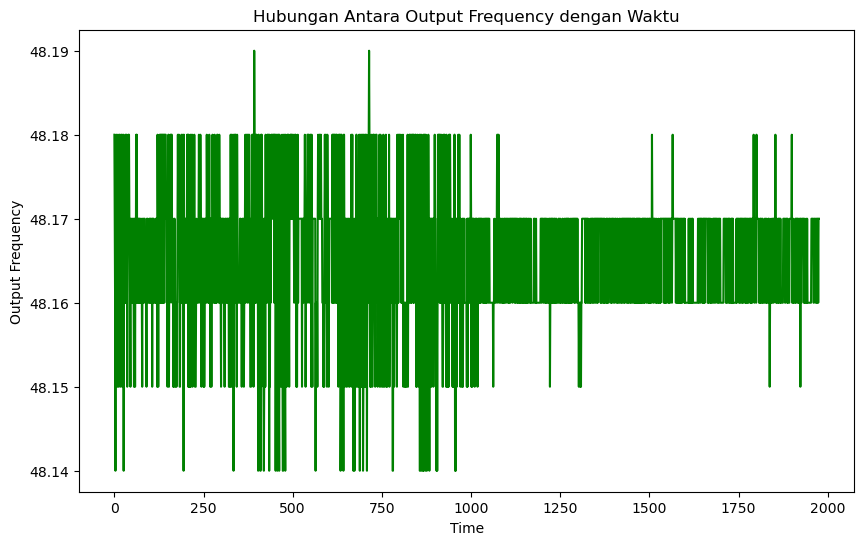

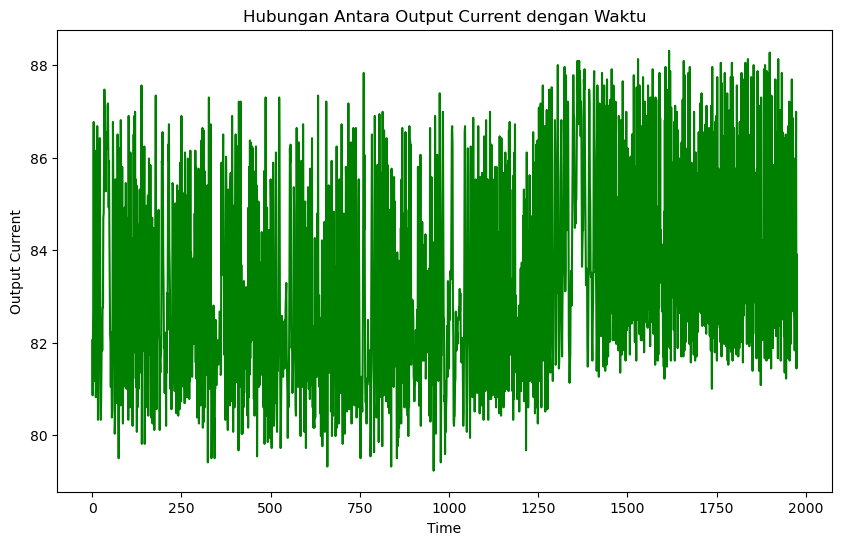

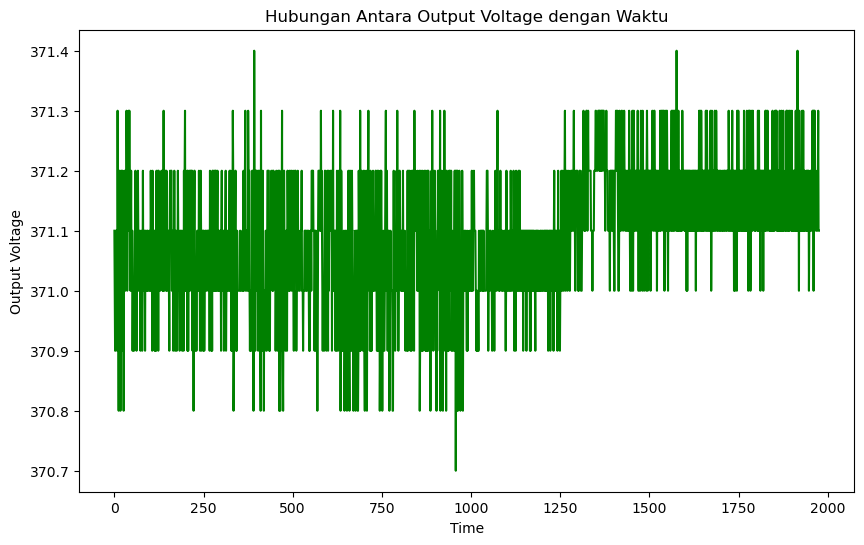

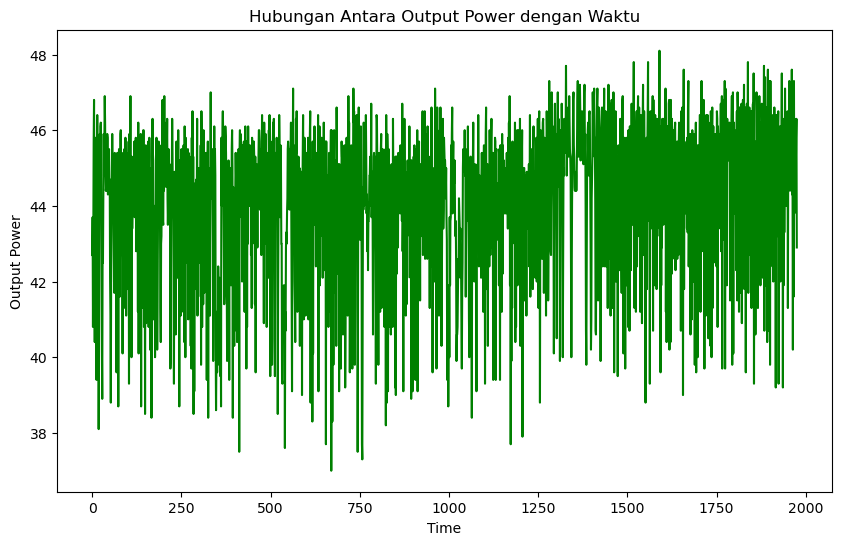

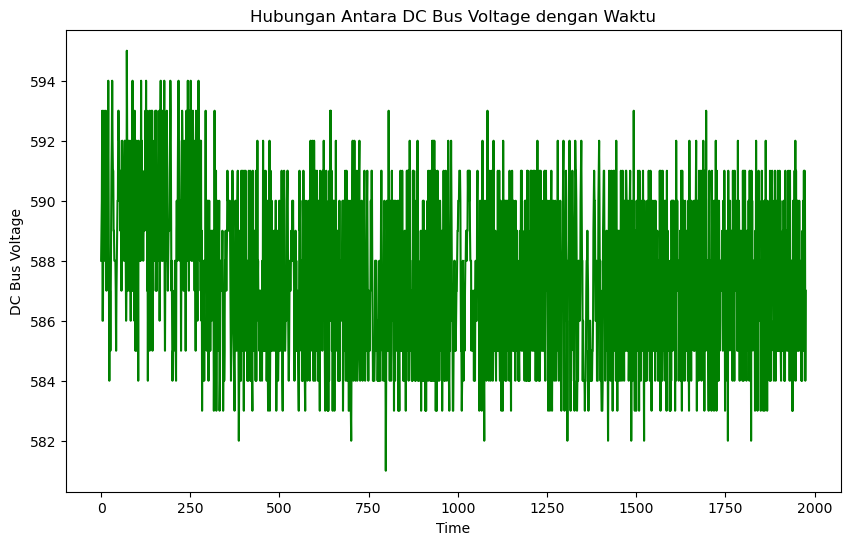

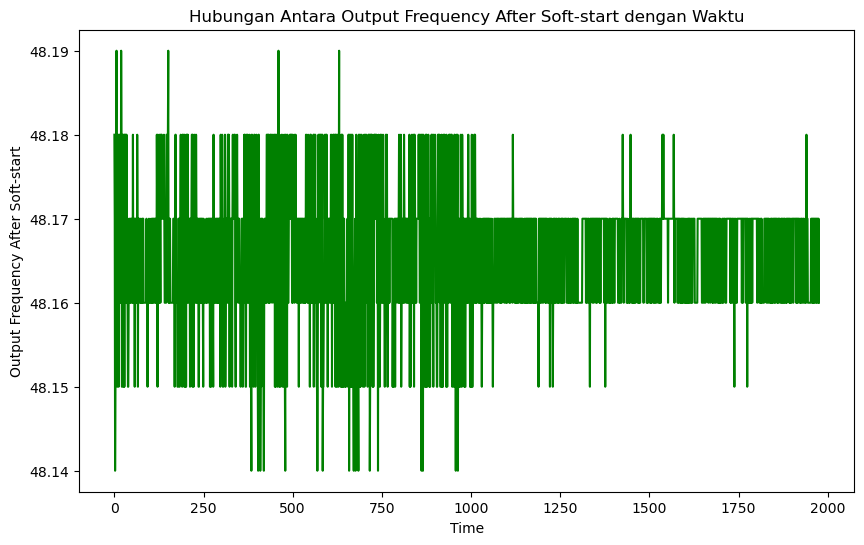

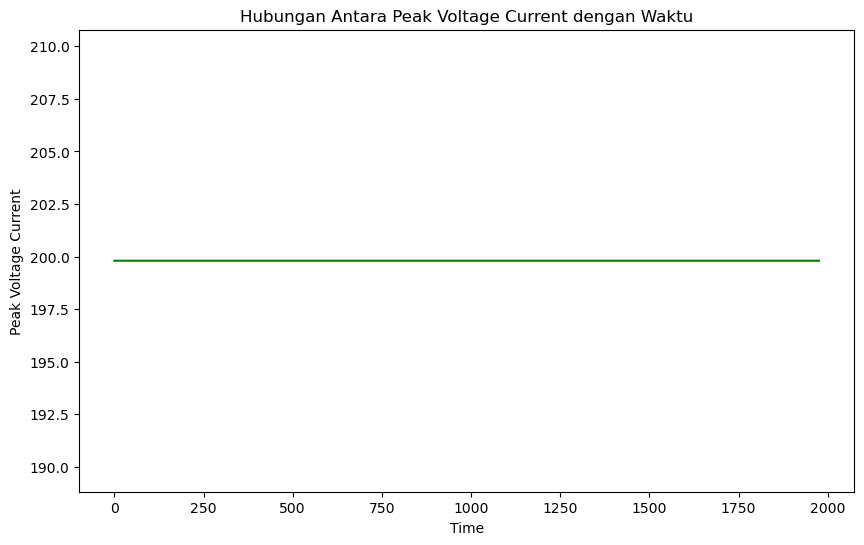

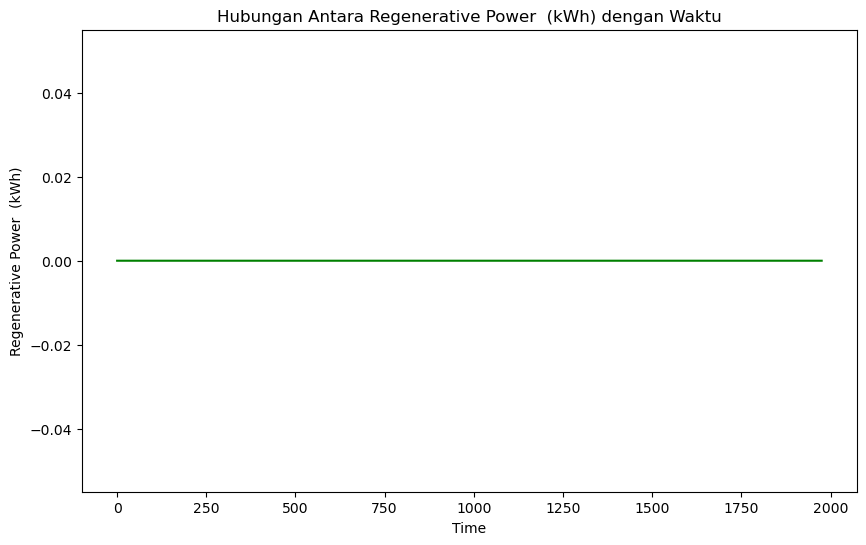

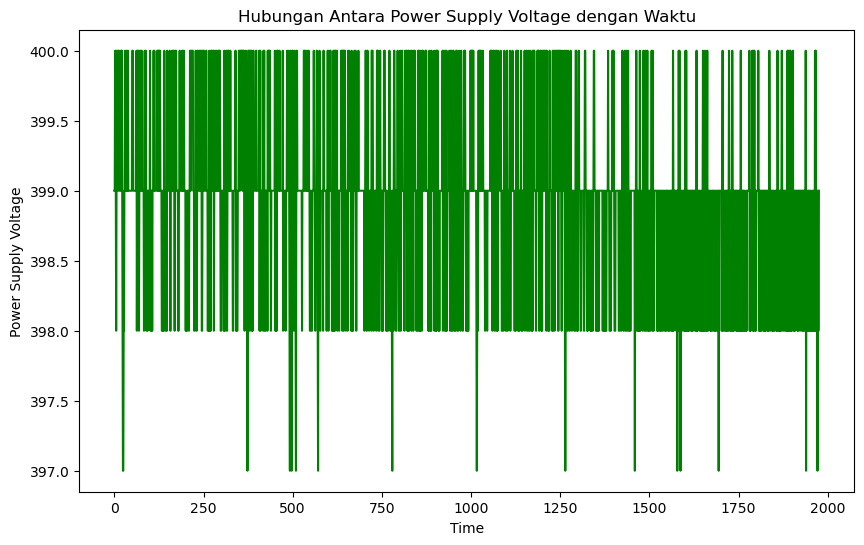

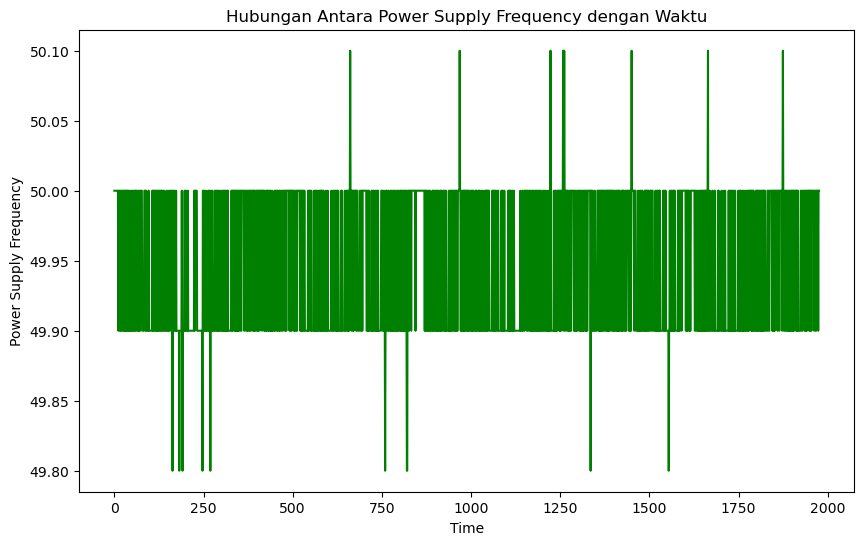

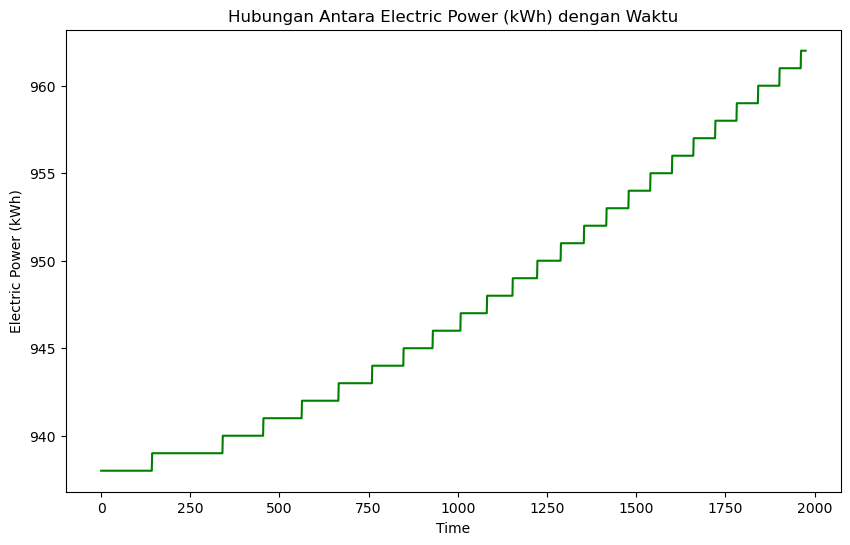

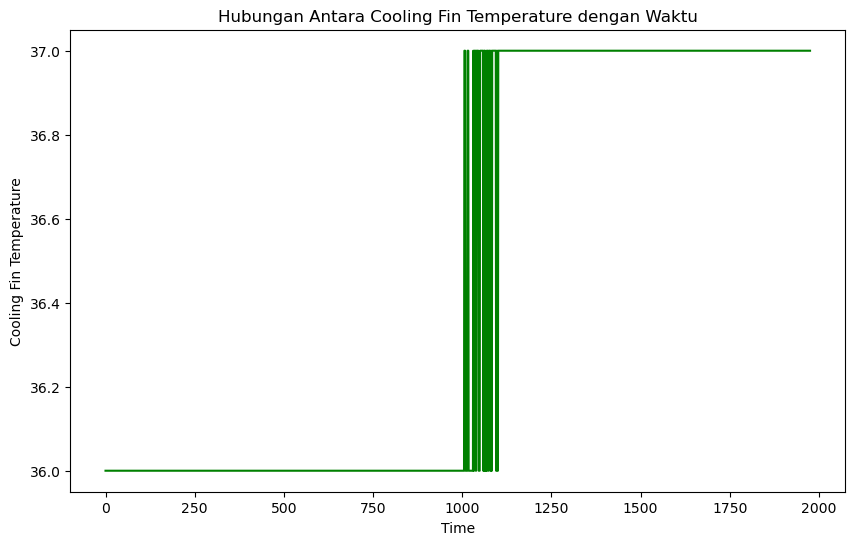

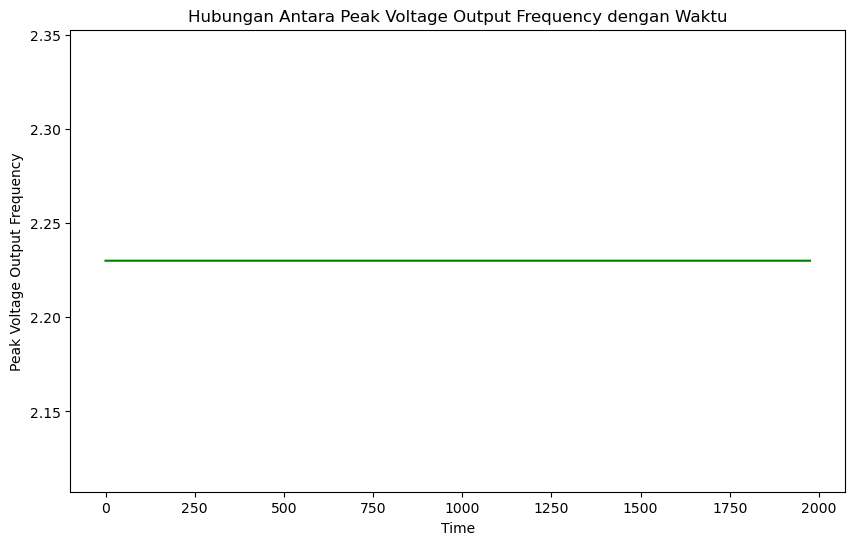

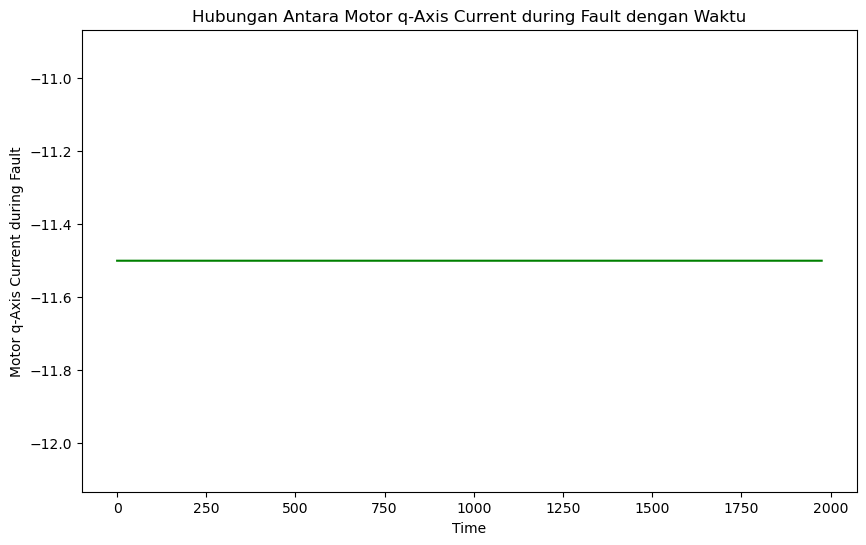

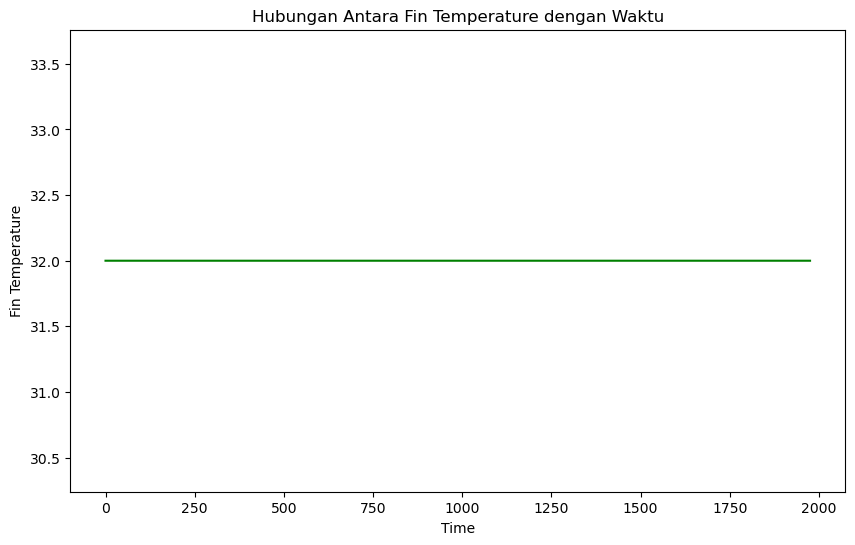

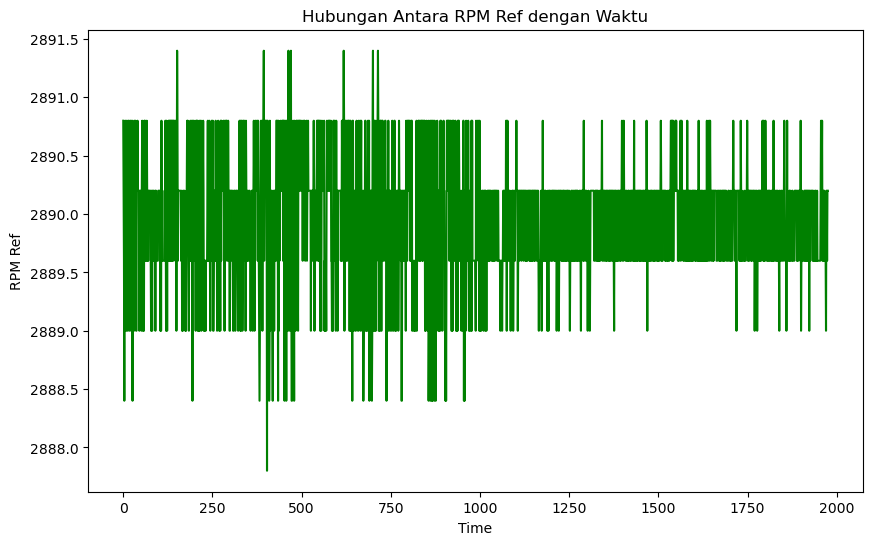

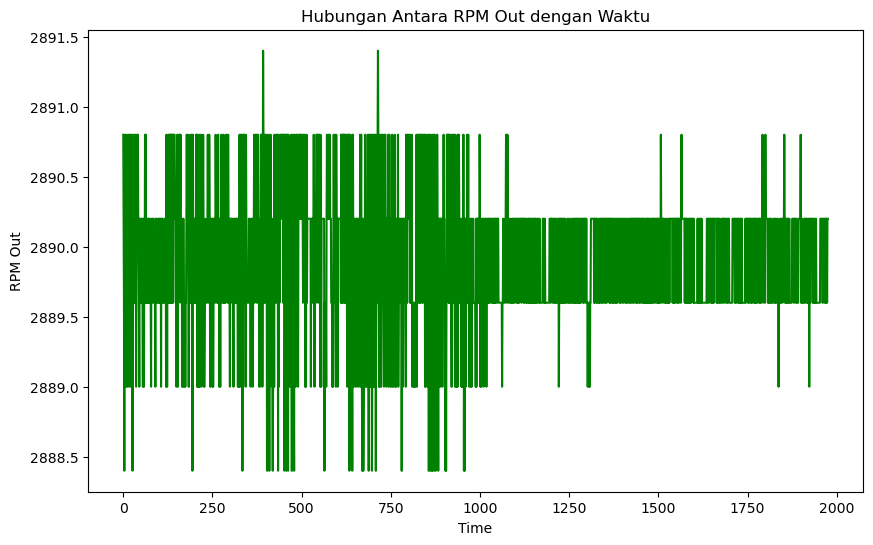

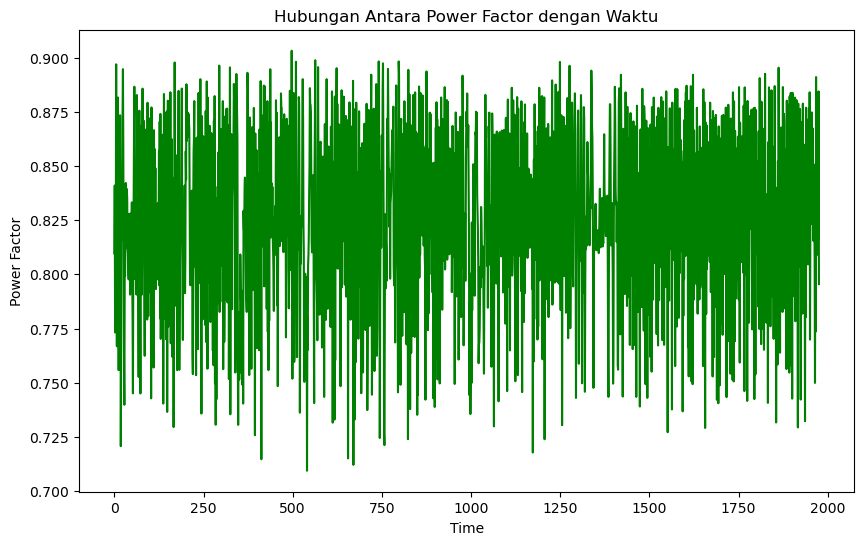

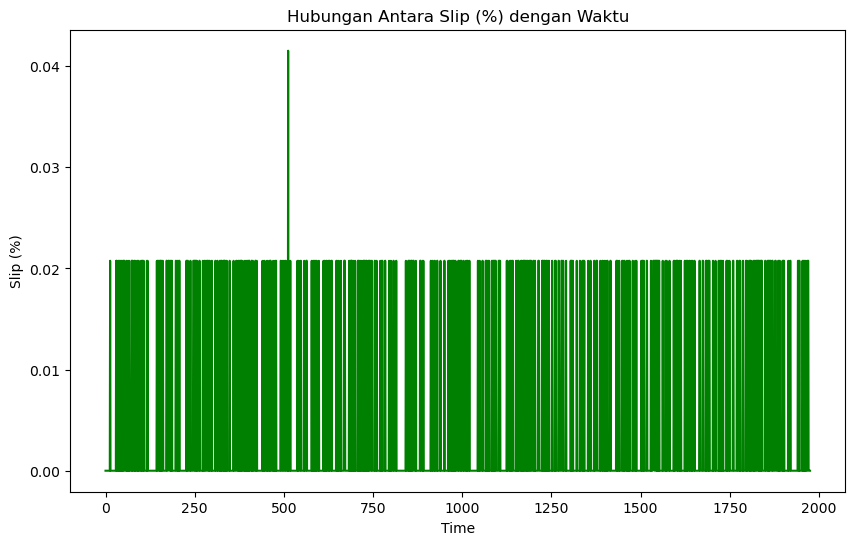

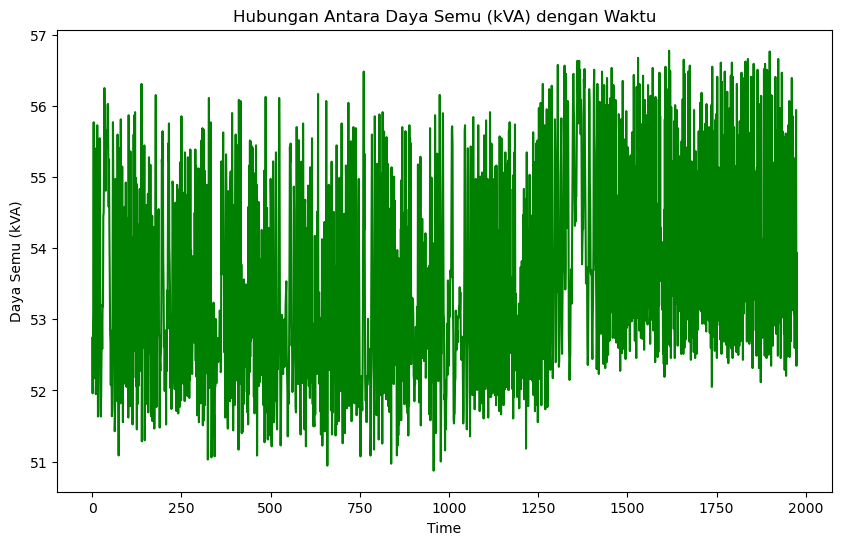

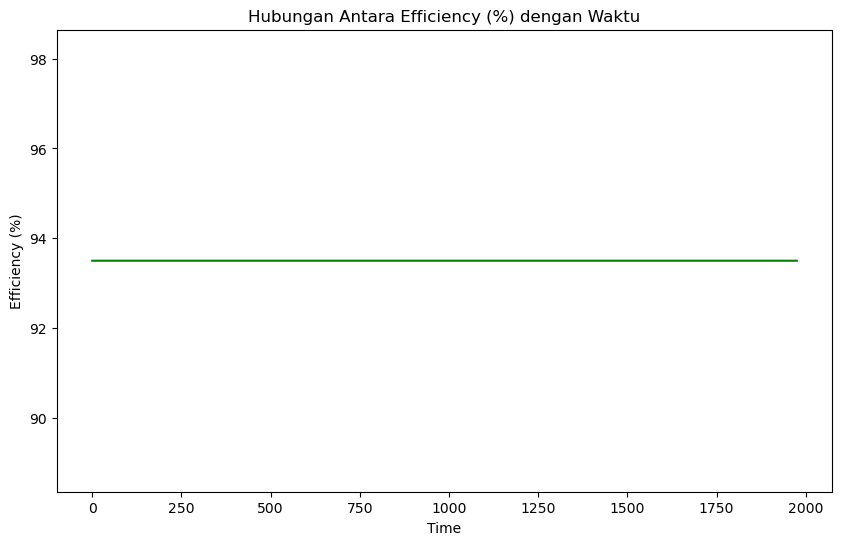

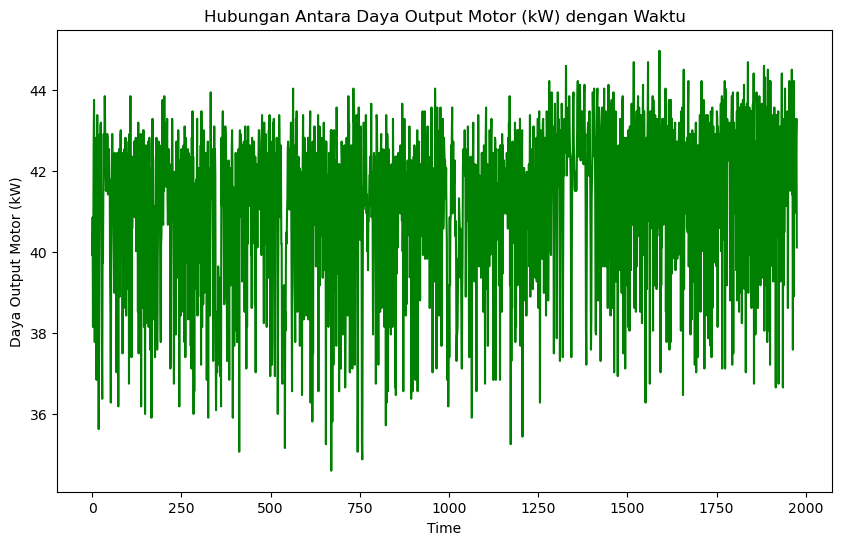

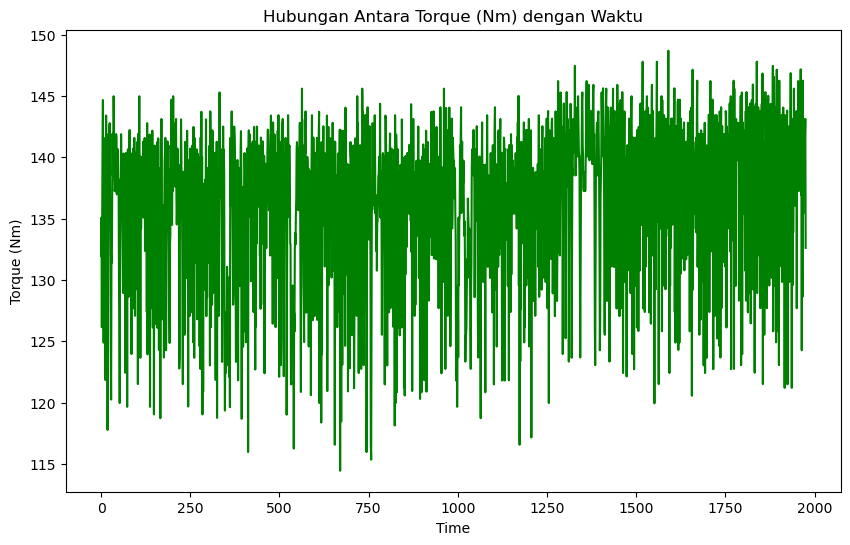

In [21]:
# Hubungan Antara Waktu dengan Variable Lain
for col in df1.columns:
    if col != "Time":
        plt.figure(figsize=(10, 6))
        plt.plot(df1.index, df1[col], label=col, color='green')
        plt.xlabel("Time")
        plt.ylabel(col)
        plt.title(f"Hubungan Antara {col} dengan Waktu")
        plt.show()

Text(0.5, 1.0, 'Hubungan Antara Output Frequency dengan Frequency Reference')

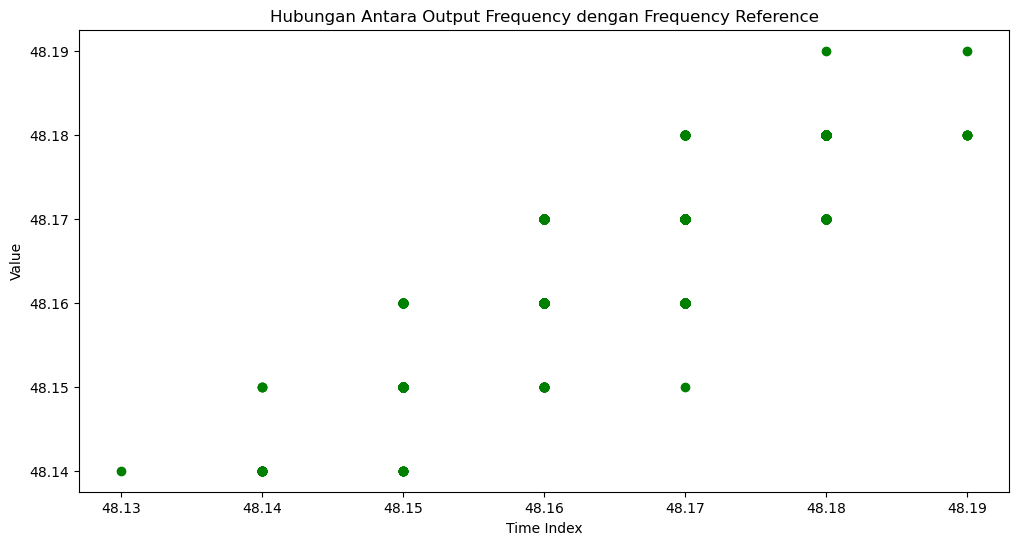

In [22]:
# Plot Output Frequency, Output Current, dan Output Power terhadap waktu
plt.figure(figsize=(12,6))
plt.scatter(df1['Frequency Reference'], df1['Output Frequency'], label='Output Frequency (Hz)', color='green')

plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Hubungan Antara Output Frequency dengan Frequency Reference')

Text(0.5, 1.0, 'Grafik Output Frequency, Current, and Power terhadap Waktu')

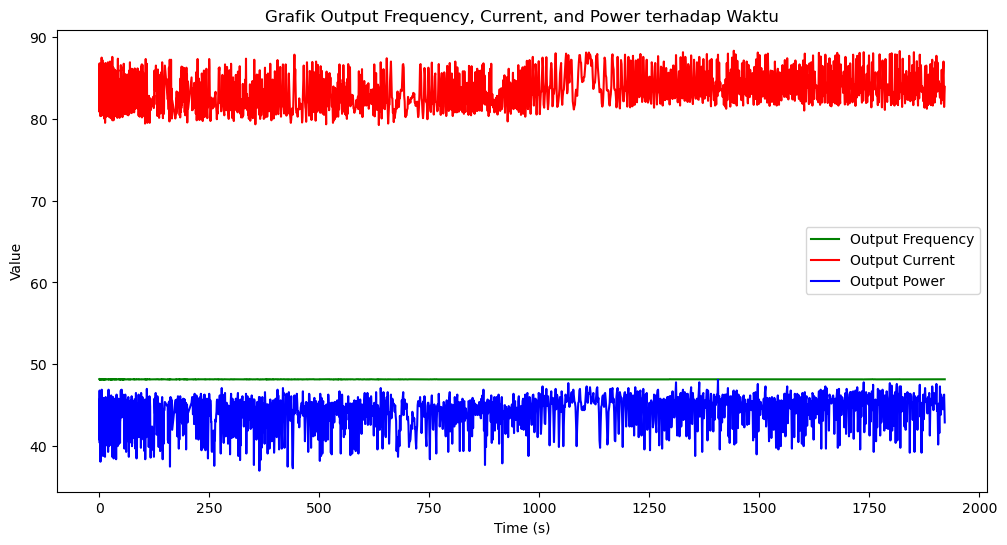

In [23]:
# Plot Output Frequency, Output Current, dan Output Power terhadap waktu
plt.figure(figsize=(12,6))
plt.plot(df1['Time'], df1['Output Frequency'], label='Output Frequency', color='green')
plt.plot(df1['Time'], df1['Output Current'], label='Output Current', color='red')
plt.plot(df1['Time'], df1['Output Power'], label='Output Power', color='blue')
plt.legend()

plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Grafik Output Frequency, Current, and Power terhadap Waktu')

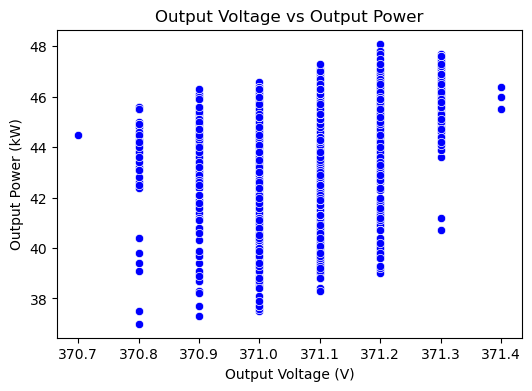

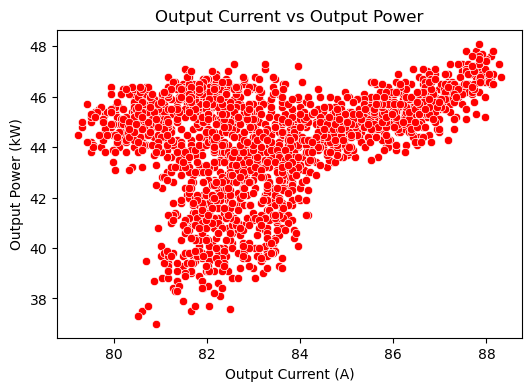

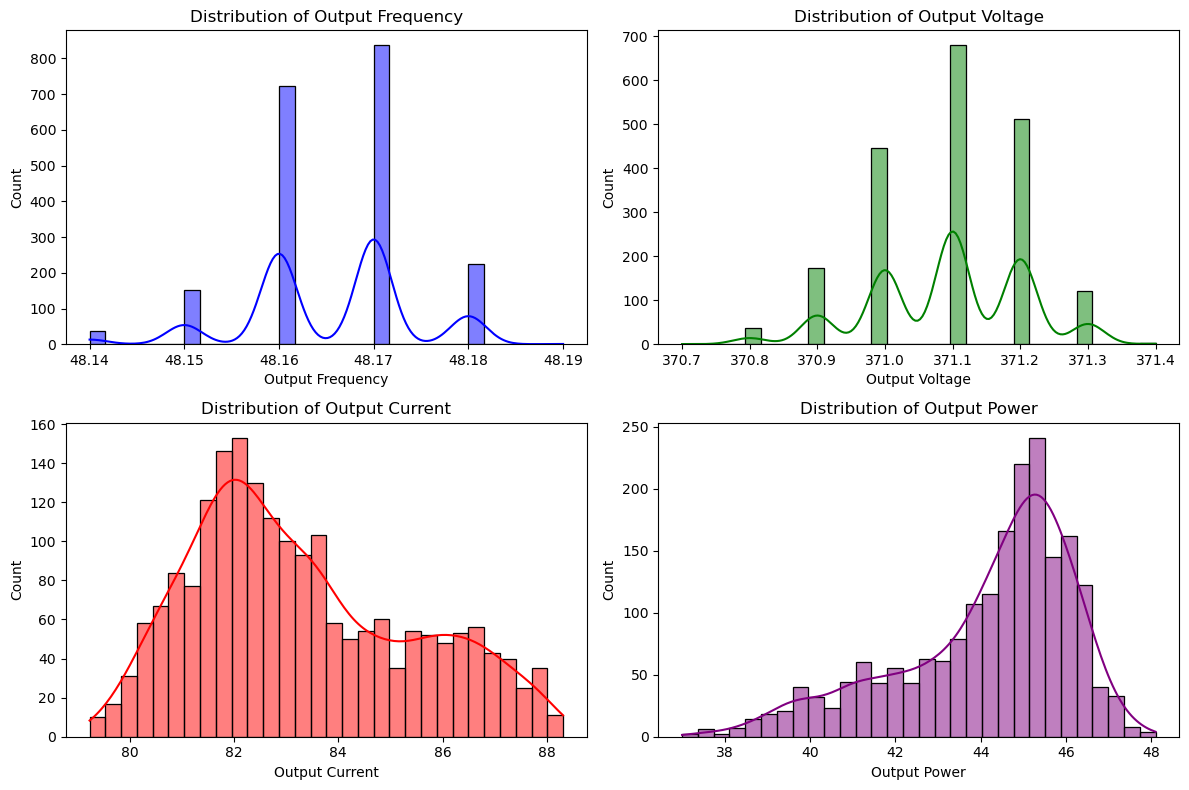

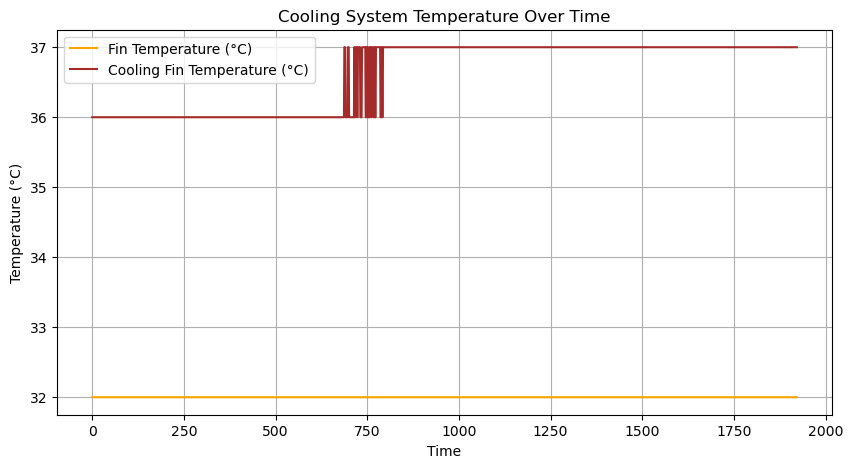

In [24]:
# 1. Scatter Plot: Output Voltage vs Output Power
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df1["Output Voltage"], y=df1["Output Power"], color="blue")
plt.xlabel("Output Voltage (V)")
plt.ylabel("Output Power (kW)")
plt.title("Output Voltage vs Output Power")
plt.show()

# 2. Scatter Plot: Output Current vs Output Power
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df1["Output Current"], y=df1["Output Power"], color="red")
plt.xlabel("Output Current (A)")
plt.ylabel("Output Power (kW)")
plt.title("Output Current vs Output Power")
plt.show()

# 3. Histogram Distribusi Data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df1["Output Frequency"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Output Frequency")

sns.histplot(df1["Output Voltage"], bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Output Voltage")

sns.histplot(df1["Output Current"], bins=30, kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Distribution of Output Current")

sns.histplot(df1["Output Power"], bins=30, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribution of Output Power")

plt.tight_layout()
plt.show()

# 4. Analisis Suhu Pendingin terhadap Waktu
plt.figure(figsize=(10, 5))
plt.plot(df1["Time"], df1["Fin Temperature"], label="Fin Temperature (°C)", color="orange")
plt.plot(df1["Time"], df1["Cooling Fin Temperature"], label="Cooling Fin Temperature (°C)", color="brown")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Cooling System Temperature Over Time")
plt.legend()
plt.grid()
plt.show()

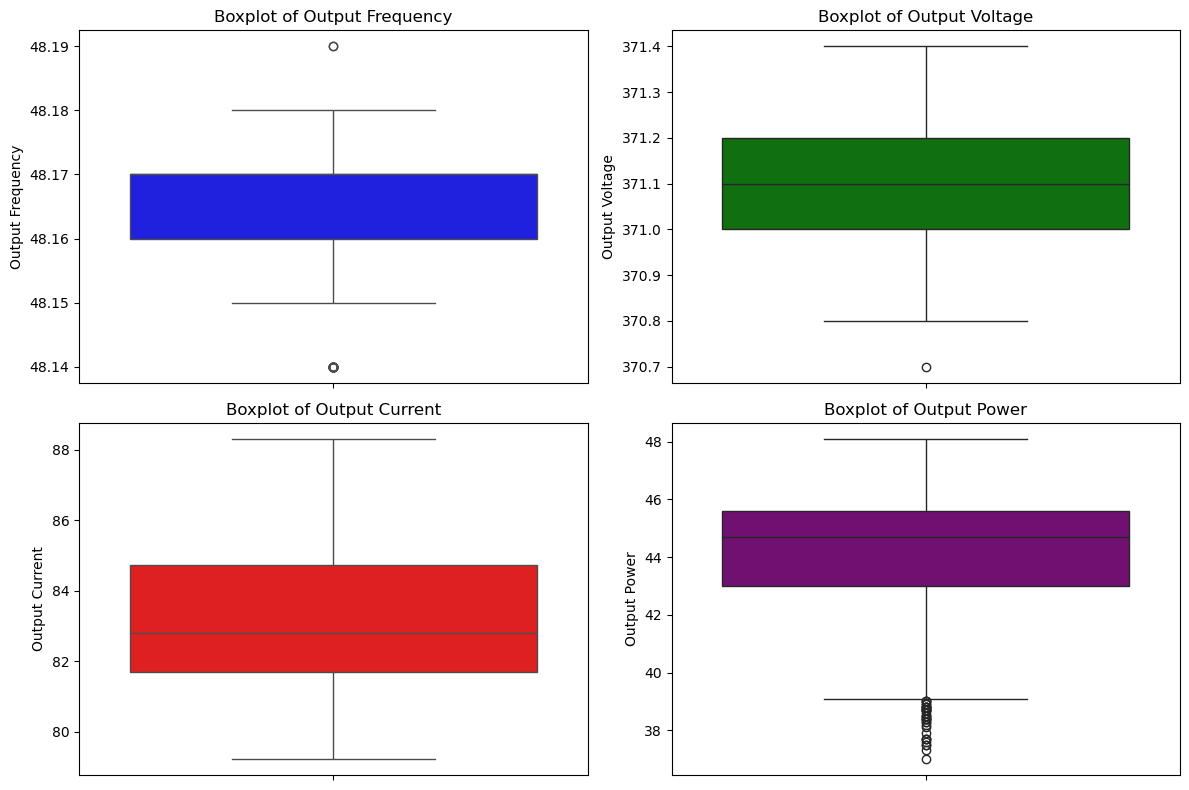

(0, 9)

In [25]:
# 1. Boxplot untuk melihat anomali dalam distribusi data utama
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y=df1["Output Frequency"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Boxplot of Output Frequency")

sns.boxplot(y=df1["Output Voltage"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Boxplot of Output Voltage")

sns.boxplot(y=df1["Output Current"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Boxplot of Output Current")

sns.boxplot(y=df1["Output Power"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Boxplot of Output Power")

plt.tight_layout()
plt.show()

# 2. Deteksi Outlier menggunakan Z-score (mengambil threshold |Z| > 3)
def detect_outliers_zscore(data, column):
    mean = np.mean(data[column])
    std = np.std(data[column])
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > 3]
    return outliers

outliers_current = detect_outliers_zscore(df1, "Output Current")
outliers_power = detect_outliers_zscore(df1, "Output Power")

# 3. Perhitungan Efisiensi Motor
cos_phi = 0.93
df1["Input Power"] = np.sqrt(3) * df1["Output Voltage"] * df1["Output Current"] * cos_phi  # P_in
df1["Efficiency (%)"] = (df1["Output Power"] / df1["Input Power"]) * 100

# Menampilkan jumlah outlier yang ditemukan
len(outliers_current), len(outliers_power)


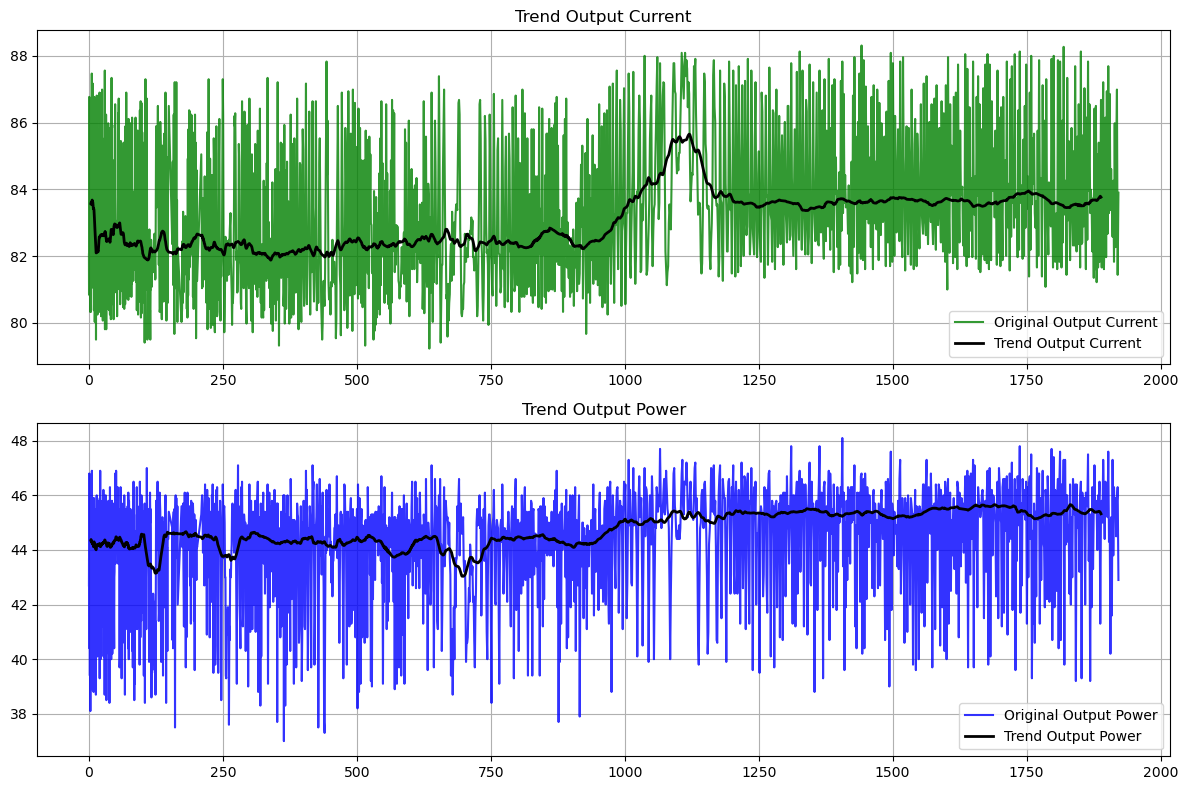

In [26]:
# Analisis Trend Jangka Panjang
from scipy.signal import medfilt

# 1. Filter Outlier dengan Median Filter
df1["Filtered Output Current"] = medfilt(df1["Output Current"], kernel_size=5)
df1["Filtered Output Power"] = medfilt(df1["Output Power"], kernel_size=5)

# 2. Deteksi Tren Jangka Panjang dengan Moving Average (Window 50)
df1["Trend Output Current"] = df1["Filtered Output Current"].rolling(window=50, center=True).mean()
df1["Trend Output Power"] = df1["Filtered Output Power"].rolling(window=50, center=True).mean()

# 3. Plot Data Sebelum dan Sesudah Filtering untuk Perbandingan
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(df1["Time"], df1["Output Current"], label="Original Output Current", alpha=0.8, color="green")
axes[0].plot(df1["Time"], df1["Trend Output Current"], label="Trend Output Current", color="black", linewidth=2)
axes[0].set_title("Trend Output Current")
axes[0].legend()
axes[0].grid()

axes[1].plot(df1["Time"], df1["Output Power"], label="Original Output Power", alpha=0.8, color="blue")
axes[1].plot(df1["Time"], df1["Trend Output Power"], label="Trend Output Power", color="black", linewidth=2)
axes[1].set_title("Trend Output Power")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


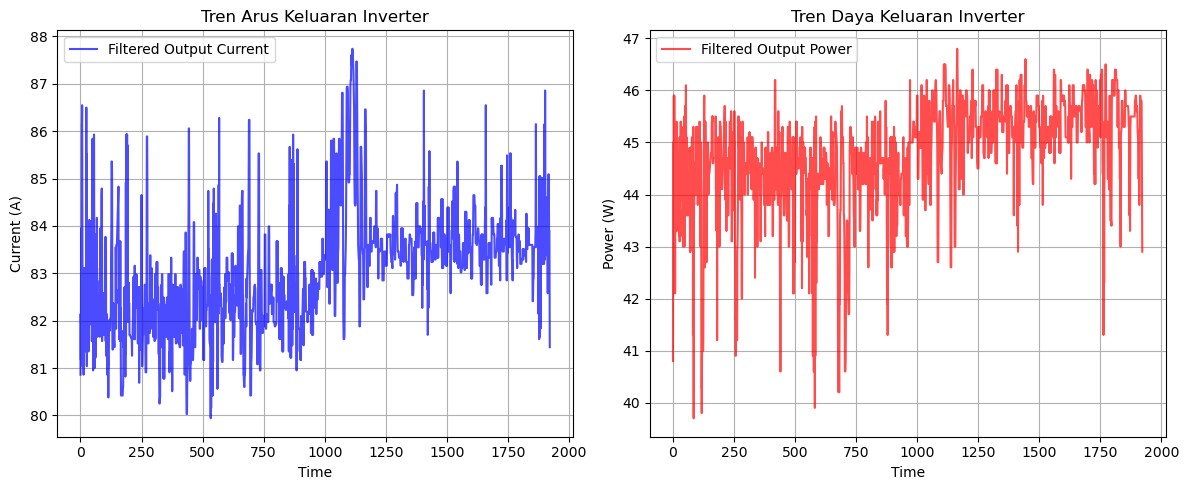

In [27]:
# Plot hubungan antara arus dan daya keluaran inverter dalam jangka waktu tertentu

plt.figure(figsize=(12, 5))

# Plot tren Output Current
plt.subplot(1, 2, 1)
plt.plot(df1["Time"], df1["Filtered Output Current"], label="Filtered Output Current", color="blue", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Current (A)")
plt.title("Tren Arus Keluaran Inverter")
plt.legend()
plt.grid()

# Plot tren Output Power
plt.subplot(1, 2, 2)
plt.plot(df1["Time"], df1["Filtered Output Power"], label="Filtered Output Power", color="red", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Tren Daya Keluaran Inverter")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
